### Task
* Given
    * Operating temp & pressure (K, atm)
    * Reaction Kinetics Information
    * Reaction Thermochemistry Information (MJ/kmol)
    * Reaction Stoichiometry
    * Composition at inlet (kmol/m3)
<br>
* To find
    * Composition at outlet (kmol/m3)
    * Cooling/Heating duty (MJ) if reactor is isothermal

#### 1.1. Using Euler's finite difference method
* 2A + B = C + 3D

In [1]:
import pandas as pd

In [2]:
stoic_cf = (-2,-1,1,3)
rate_const = 8
axial_vel = 1.2
cs_area = 1.2e-3
pfr_length = 1.1
length_step = pfr_length/10     # 10 nodes excluding endpoint
element_vol = cs_area * length_step

In [3]:
moles_A = {0.00:0.8} # Keys will be z-co-ordinate
moles_B = {0.00:0.5}
moles_C = {0.00:0}
moles_D = {0.00:0}

for i in range(10):
    z_coord = i*length_step
    z_next = z_coord + length_step

    # Calculate rate of reaction in this element w.r.t. A
    rate_A = rate_const * (moles_A[float(f"{z_coord:.2f}")] ** abs(stoic_cf[0]))
    
    # Calculate concentration to check for limiting reactant
    next_moles_A = moles_A[float(f"{z_coord:.2f}")] - \
                    (rate_A * cs_area * (length_step ** 2)/(cs_area*axial_vel))

    next_moles_B = moles_B[float(f"{z_coord:.2f}")] - \
                    ((stoic_cf[1]/stoic_cf[0]) * (moles_A[float(f"{z_coord:.2f}")] - next_moles_A))
    
    next_moles_C = moles_C[float(f"{z_coord:.2f}")] - \
                    ((stoic_cf[2]/stoic_cf[0]) * (moles_A[float(f"{z_coord:.2f}")] - next_moles_A))
    
    next_moles_D = moles_D[float(f"{z_coord:.2f}")] - \
                    ((stoic_cf[3]/stoic_cf[0]) * (moles_A[float(f"{z_coord:.2f}")] - next_moles_A))

    # Check for limiting reactant. Only proceed if no concentration is equal to 0
    if next_moles_A != 0 and next_moles_B != 0:
        moles_A[float(f"{z_next:.2f}")] = next_moles_A
        moles_B[float(f"{z_next:.2f}")] = next_moles_B
        moles_C[float(f"{z_next:.2f}")] = next_moles_C
        moles_D[float(f"{z_next:.2f}")] = next_moles_D



In [4]:
df_moles = pd.DataFrame(data=[moles_A,moles_B,moles_C,moles_D],
                       index=["moles_A","moles_B","moles_C","moles_D"]).transpose()
df_moles

,moles_A,moles_B,moles_C,moles_D
0.00,0.800000,0.500000,0.000000,0.000000
0.11,0.748373,0.474187,0.025813,0.077440
0.22,0.703195,0.451597,0.048403,0.145208
0.33,0.663307,0.431653,0.068347,0.205040
0.44,0.627815,0.413908,0.086092,0.258277
0.55,0.596020,0.398010,0.101990,0.305969
0.66,0.567364,0.383682,0.116318,0.348954
0.77,0.541398,0.370699,0.129301,0.387904
0.88,0.517753,0.358877,0.141123,0.423370
0.99,0.496129,0.348065,0.151935,0.455806


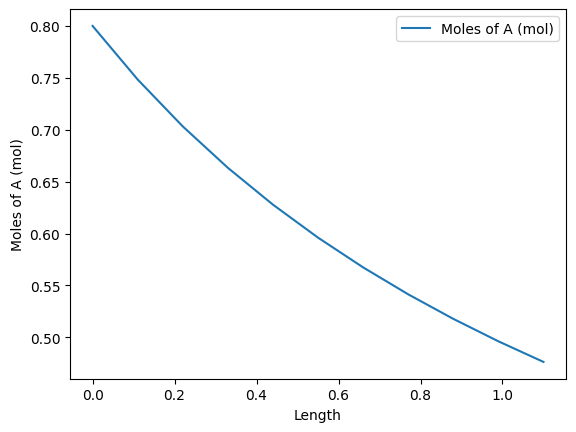

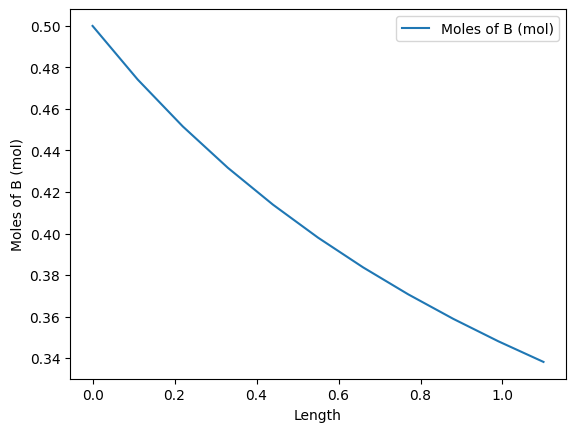

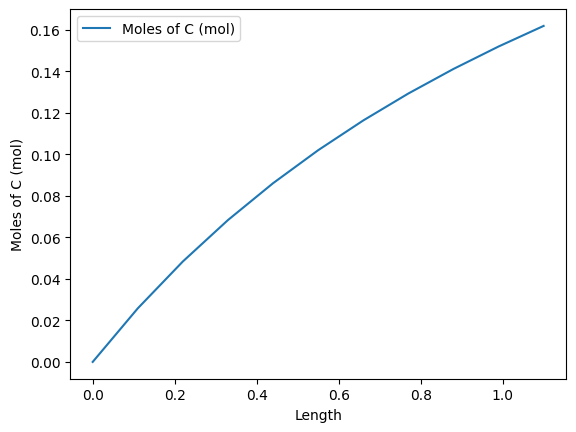

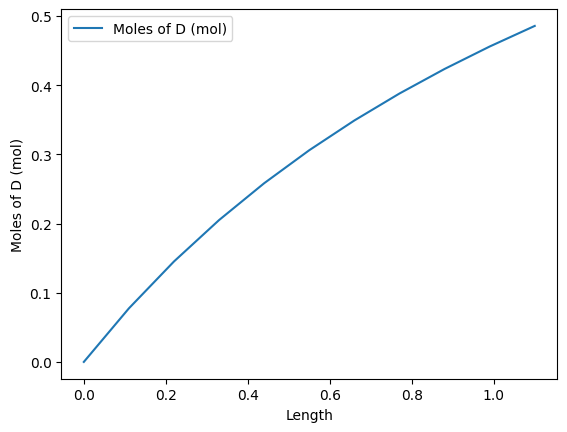

In [5]:
from matplotlib_funcs import *

plot_matplotlib_style(df_moles.index,df_moles["moles_A"],"Length","Moles of A (mol)","Moles of A (mol)")
plot_matplotlib_style(df_moles.index,df_moles["moles_B"],"Length","Moles of B (mol)","Moles of B (mol)")
plot_matplotlib_style(df_moles.index,df_moles["moles_C"],"Length","Moles of C (mol)","Moles of C (mol)")
plot_matplotlib_style(df_moles.index,df_moles["moles_D"],"Length","Moles of D (mol)","Moles of D (mol)")